# Visualizing Mantle Convection Model Output to Better Understand Model Architecture and Dynamic Topography

### Andrew Hollyday RCES 2019 Final Project

### The goal of this project is to use visualization to better understand the structure of ASPECT model output.  Additionally, I seek to evaluate spatial patterns in the model output.  

In [1]:
conda install -c conda-forge cartopy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mayavi

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install requests

In [104]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
import pandas as pd
import shapefile
import pyproj
import matplotlib.colors as colors
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import matplotlib as mpl 
import matplotlib.pyplot as plt
from numpy import arange,meshgrid,sqrt
from mayavi.mlab import *
import math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [105]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)  

In [106]:
file_id = '1diu3WqGm9WzdoHQjGocSfSfkSDr-bplX'
destination = '/Users/andrewhollyday/DT_MODEL_output'
download_file_from_google_drive(file_id, destination)

In [107]:
file_id = '1_6EW9oYNP8leXQX0-6L8miuf5QiP6026'
destination = '/Users/andrewhollyday/Solution0_output.csv'
download_file_from_google_drive(file_id, destination)

In [108]:
file_id = '1duK3Kpg1r7_rS7DOSbgvoNezAsNew-8F'
destination = '/Users/andrewhollyday/Solution5_output.csv'
download_file_from_google_drive(file_id, destination)

In [109]:
df = pd.read_csv('/Users/andrewhollyday/DT_MODEL_output', header=None, sep = '\s', names = ['1','2','3','4','5','6','7'])

/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [110]:
df = df.drop(columns="2")
df = df.drop(columns="4")
df = df.drop(columns="6")
df = df.rename(columns = {"1": "Azimuth", "3": "Elevation", "5": "r", "7": "Surface_Topography_m"})
df.Azimuth = df.Azimuth*(180/np.pi)
df.Elevation = df.Elevation*(180/np.pi)

In [111]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

Text(0.5, 1.0, 'Change in Dynamic Topography (m) over 4 Ma based on Convection Model')

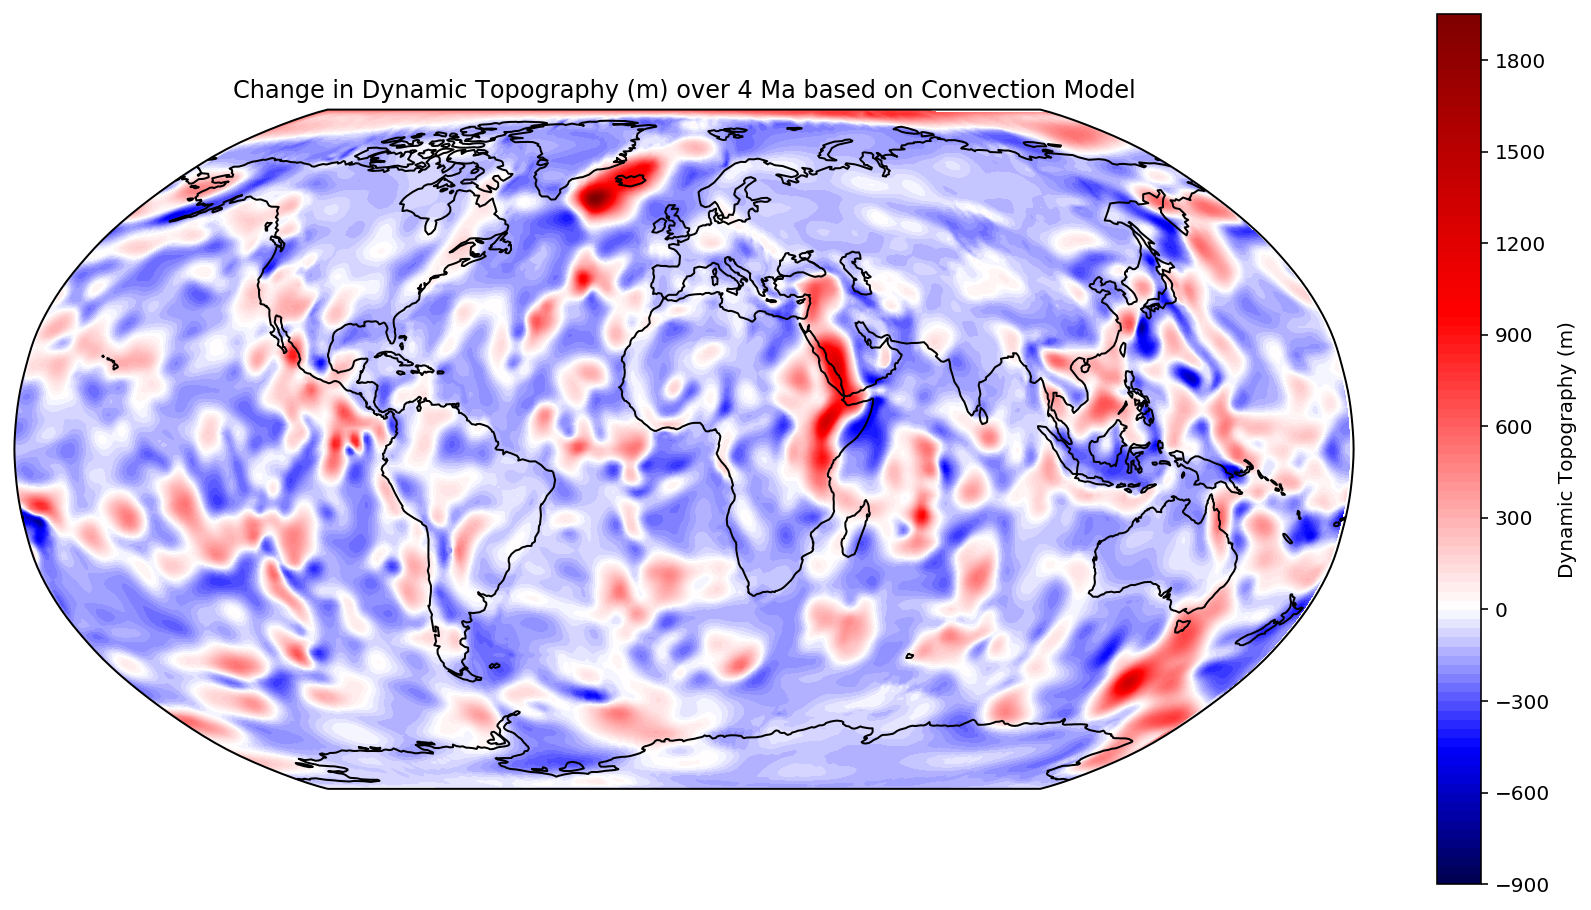

In [112]:
from scipy.interpolate import griddata

# data coordinates and values
x = df.Azimuth
y = df.Elevation
z = df.Surface_Topography_m

# target grid to interpolate to
xi = np.arange(-180,180,1)
yi = np.arange(-90,90,1)
xi,yi = np.meshgrid(xi,yi)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# plot
fig, ax = plt.subplots(figsize=(15,8),subplot_kw={'projection': ccrs.Robinson()})

#fig = plt.figure()
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
map1 = ax.contourf(xi,yi,zi,100,transform=ccrs.PlateCarree(), cmap = 'seismic', cbar_kwargs={}, norm = MidpointNormalize(midpoint=0.))
cbar = fig.colorbar(map1, label='Dynamic Topography (m)')
ax.set_title('Change in Dynamic Topography (m) over 4 Ma based on Convection Model')

This map shows the global distrubtion of surface deflections (dynamic uplift/subsidence) due to mantle convection over the past 4 Ma.  The model if fed with two mantle tomography models, including a coarse lower mantle model and a high-resolution upper mantle model.  

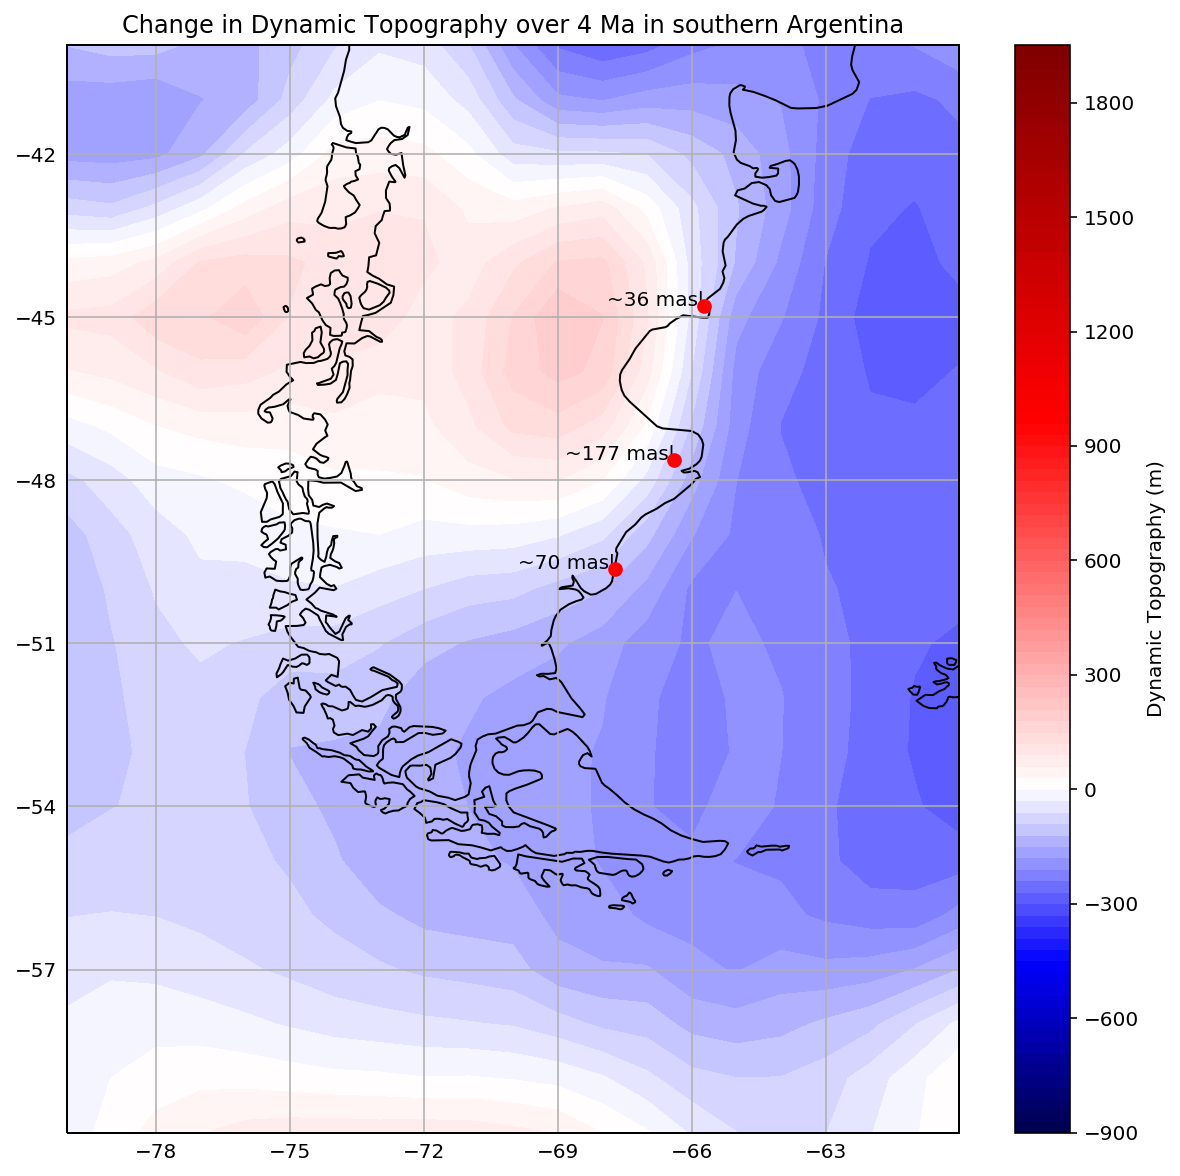

In [113]:
# data coordinates and values
x = df.Azimuth
y = df.Elevation
z = df.Surface_Topography_m

# target grid to interpolate to
xi = np.arange(-180,180,1)
yi = np.arange(-90,90,1)
xi,yi = np.meshgrid(xi,yi)

# interpolate
zi = griddata((x,y),z,(xi,yi),method='linear')

# plot
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})

#fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution='50m')
map2 = ax.contourf(xi,yi,zi,100,transform=ccrs.PlateCarree(), cmap = 'seismic', cbar_kwargs={}, norm = MidpointNormalize(midpoint=0.))
extent = [-80, -60, -60, -40]
ax.set_extent(extent)
cbar = fig.colorbar(map2, label='Dynamic Topography (m)')
ax.set_aspect('auto')

camarones_lat = -44.79008307
camarones_lon = -65.72760471
canadon_lat = -49.627778
canadon_lon = -67.714722
cerro_lat = -47.629167
cerro_lon = -66.391667

ax.scatter(camarones_lon, camarones_lat, zorder=5, c='r', s=40)
ax.scatter(canadon_lon, canadon_lat, zorder=5, c='r', s=40)
ax.scatter(cerro_lon, cerro_lat, zorder=5, c='r', s=40)
ax.text(camarones_lon,camarones_lat,'~36 masl',horizontalalignment='right')
ax.text(canadon_lon,canadon_lat,'~70 masl',horizontalalignment='right')
ax.text(cerro_lon,cerro_lat,'~177 masl',horizontalalignment='right')
ax.set_title('Change in Dynamic Topography over 4 Ma in southern Argentina')
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

This figure zooms into the southern Argentina region, where three early Pliocene shorelines have been identified.  These shorelines represent similar elevations during formation; however, their current elevations are not equal.  This may be due to dynamic topogrpahy.  These results show that dynamic uplift occurs in this region in a spatial pattern that may explain the sites' current elevations.  That said, these model results only go back 4Ma, and the shorelines date back to ~5Ma.   

In [114]:
ds = pd.read_csv('/Users/andrewhollyday/Solution5_output.csv', header=None)
ds.columns = ['vel_0', 'vel_1', 'vel_2', 'grav_0', 'grav_1', 'grav_2', 'p', 'T', 'geoid', 'heat_flux','DT', 'strain_rate', 'density', 'viscosity', 'non_ad_T', 'azimuth','elevation','r']
ds_u = ds
ds_u.azimuth = ds_u.azimuth*(180/np.pi)
ds_u.elevation = ds_u.elevation*(180/np.pi)
ds_u['r'] = (((max(ds_u['r'])) + 25000) - ds_u['r'])/1000
ds_u['r_again'] = ds_u['r']
ds_u['r_rounded'] = ds_u['r'].round(0)
ds_u['depth_round_2'] = ds_u['r_rounded']

In [115]:
gb = ds_u.groupby('r_rounded')
ds_1 = gb.aggregate(np.mean)

Text(0.5, 1.0, 'Hawaii Cross Section')

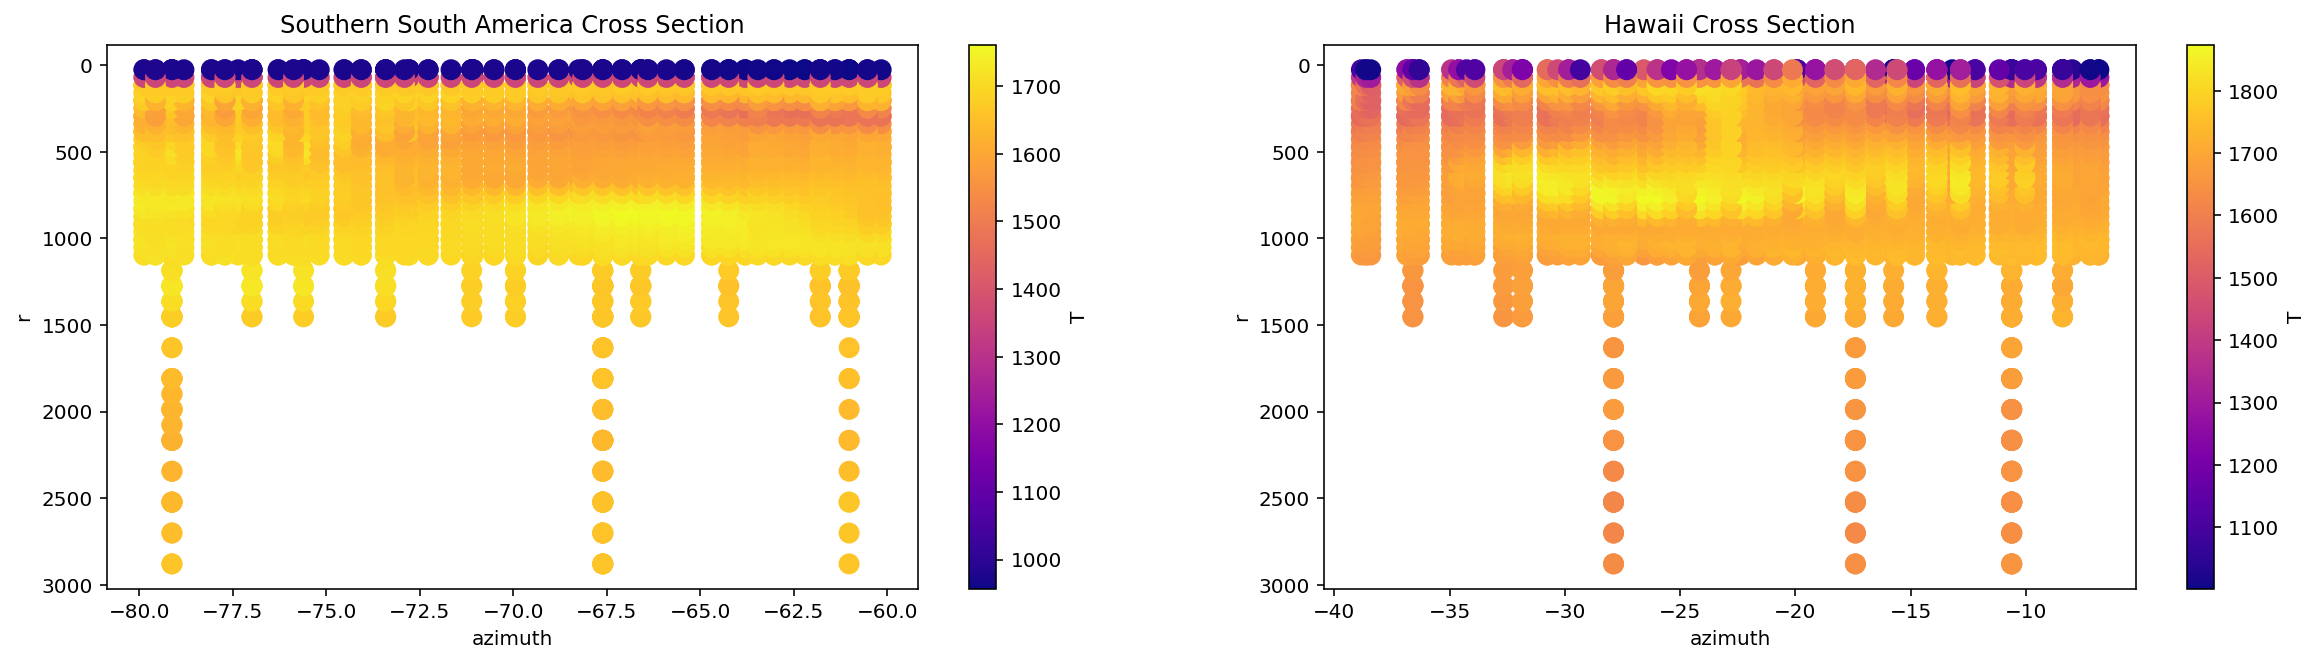

In [116]:
ds_a = ds.loc[ds['elevation']>62]
ds_b = ds_a.loc[ds['elevation']<65]
ds_c = ds_b.loc[ds['azimuth']>-40]
ds_d = ds_c.loc[ds['azimuth']<-6]

####################################################################################################################

x = ds_d['azimuth']
y = ds_d['depth_round_2']
depth_z = ds_d['T']
xi = np.arange(-40,-6,1)
yi = np.arange(0,2901,1)
xi,yi = np.meshgrid(xi,yi)
zi = griddata((x,y),depth_z,(xi,yi),method='linear')

####################################################################################################################
ds_a1 = ds.loc[ds['elevation']>47]
ds_b1 = ds_a1.loc[ds['elevation']<50]
ds_c1 = ds_b1.loc[ds['azimuth']>-80]
ds_d1 = ds_c1.loc[ds['azimuth']<-60]

x1 = ds_d1['azimuth']
y1 = ds_d1['depth_round_2']
depth_z1 = ds_d1['T']

xi1 = np.arange(-80,-60,1)
yi1 = np.arange(0,2901,1)
xi1,yi1 = np.meshgrid(xi1,yi1)
zi1 = griddata((x1,y1),depth_z1,(xi1,yi1),method='linear')

####################################################################################################################
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,5))

ds_d1.plot.scatter(ax=ax1,x= 'azimuth', y = 'r', c = 'T', cmap = 'plasma', s = 90).invert_yaxis()
ds_d.plot.scatter(ax=ax2,x= 'azimuth', y = 'r', c = 'T', cmap = 'plasma', s = 90).invert_yaxis()

ax1.set_title('Southern South America Cross Section')
ax2.set_title('Hawaii Cross Section')

These are first order scatter plots of cross sections of the data to visualize the structure before performing interpolation.  Note: the grid is inconsistent across the profile.  This is due to adaptive mesh refinement in the convection model. 

/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  """
/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  import sys


Text(0.5, 1, 'Mantle Temperature Cross Section at 64˚N')

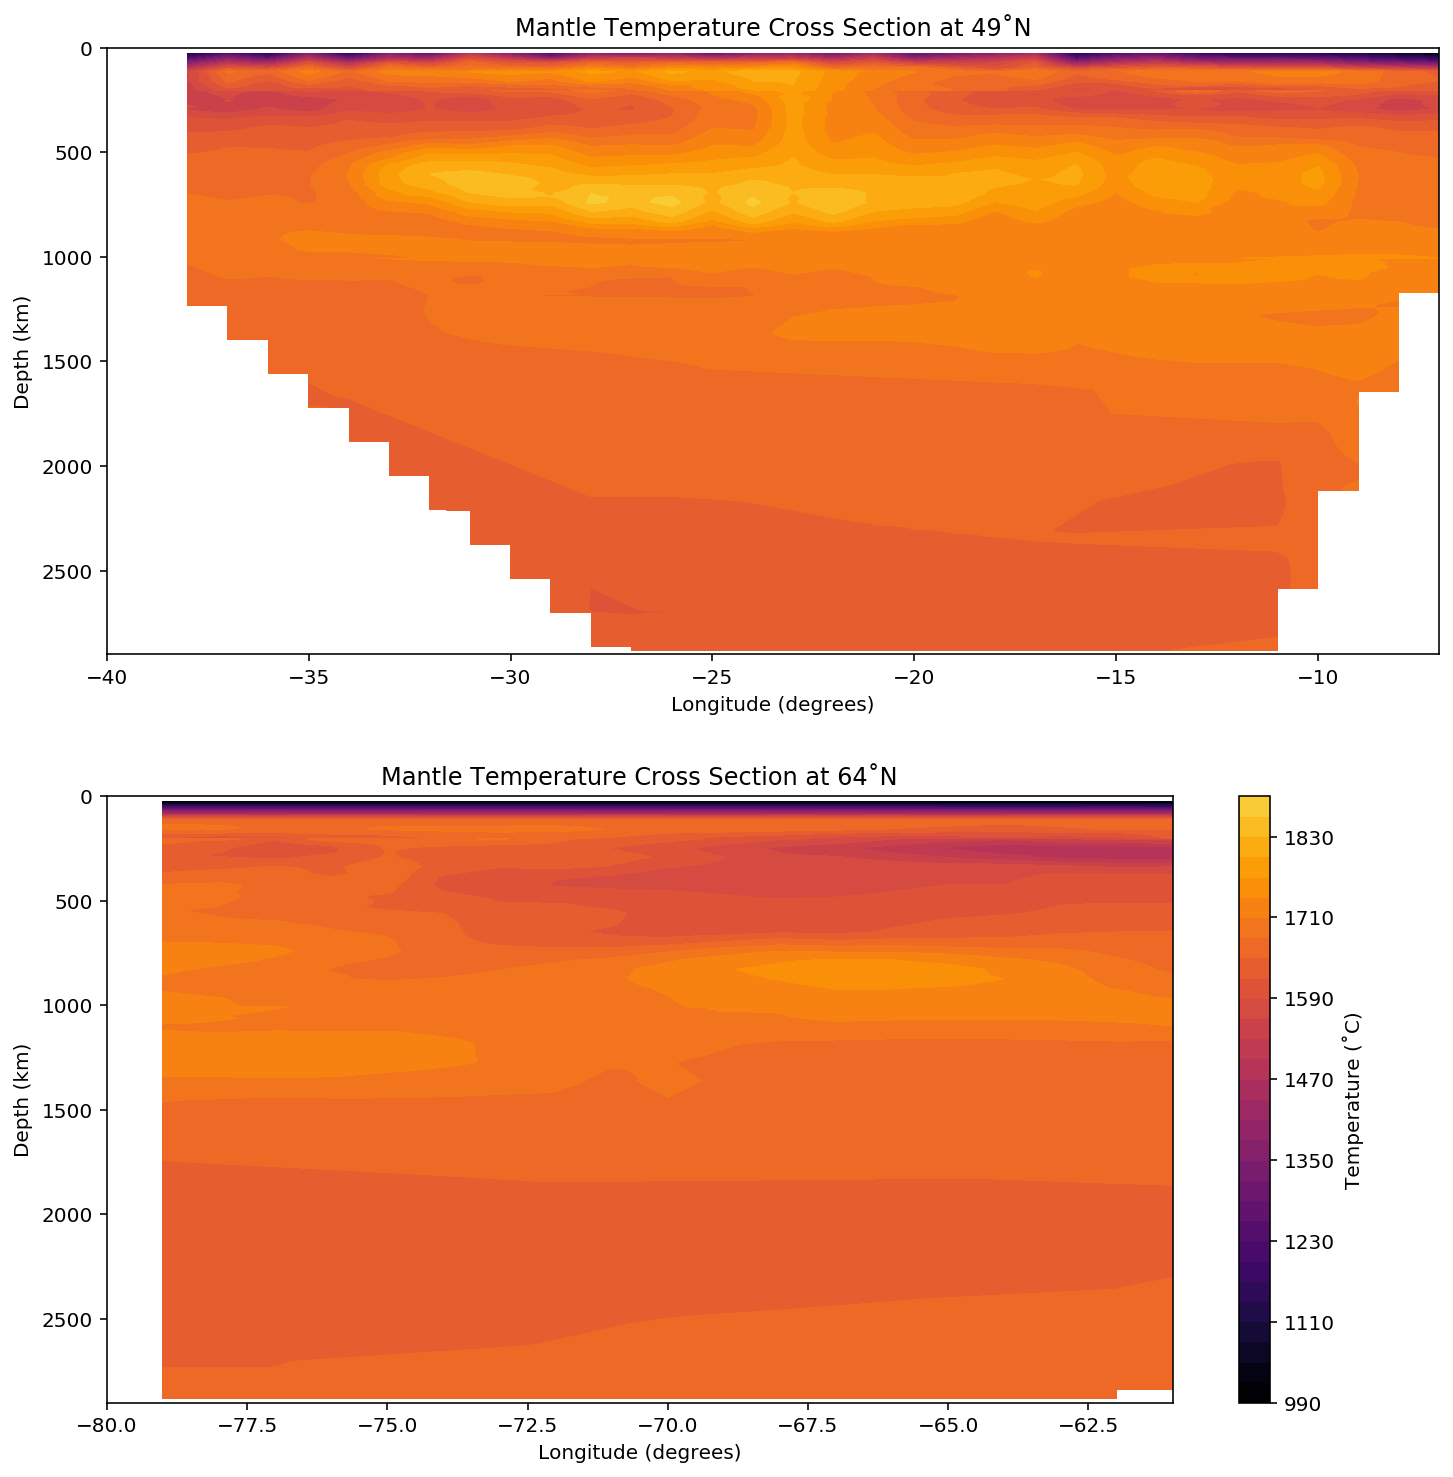

In [117]:
fig, (ax_a, ax_b) = plt.subplots(2,1,figsize=(10,10), sharey = True)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

ax_a.invert_yaxis()
CS = ax_a.contourf(xi,yi,zi,30, cmap = plt.cm.inferno, cbar_kwargs={},vmin=1000,vmax=2000)
cbar = fig.colorbar(CS, label='Temperature (˚C)')
CS1 = ax_b.contourf(xi1,yi1,zi1,30, cmap =plt.cm.inferno, cbar_kwargs={},vmin=1000,vmax=2000)

ax_a.set_aspect('auto')
ax_b.set_aspect('auto')
plt.tight_layout(h_pad=5)

ax_a.set_ylabel("Depth (km)")
ax_a.set_xlabel("Longitude (degrees)")
ax_a.set_title('Mantle Temperature Cross Section at 49˚N')

ax_b.set_ylabel("Depth (km)")
ax_b.set_xlabel("Longitude (degrees)")
ax_b.set_title('Mantle Temperature Cross Section at 64˚N')

This is a 2D cross section average over a narrow rectangular area.  I'm interested in comparing this visualization tool with tools below.  

Text(0.5, 1.0, 'Localities')

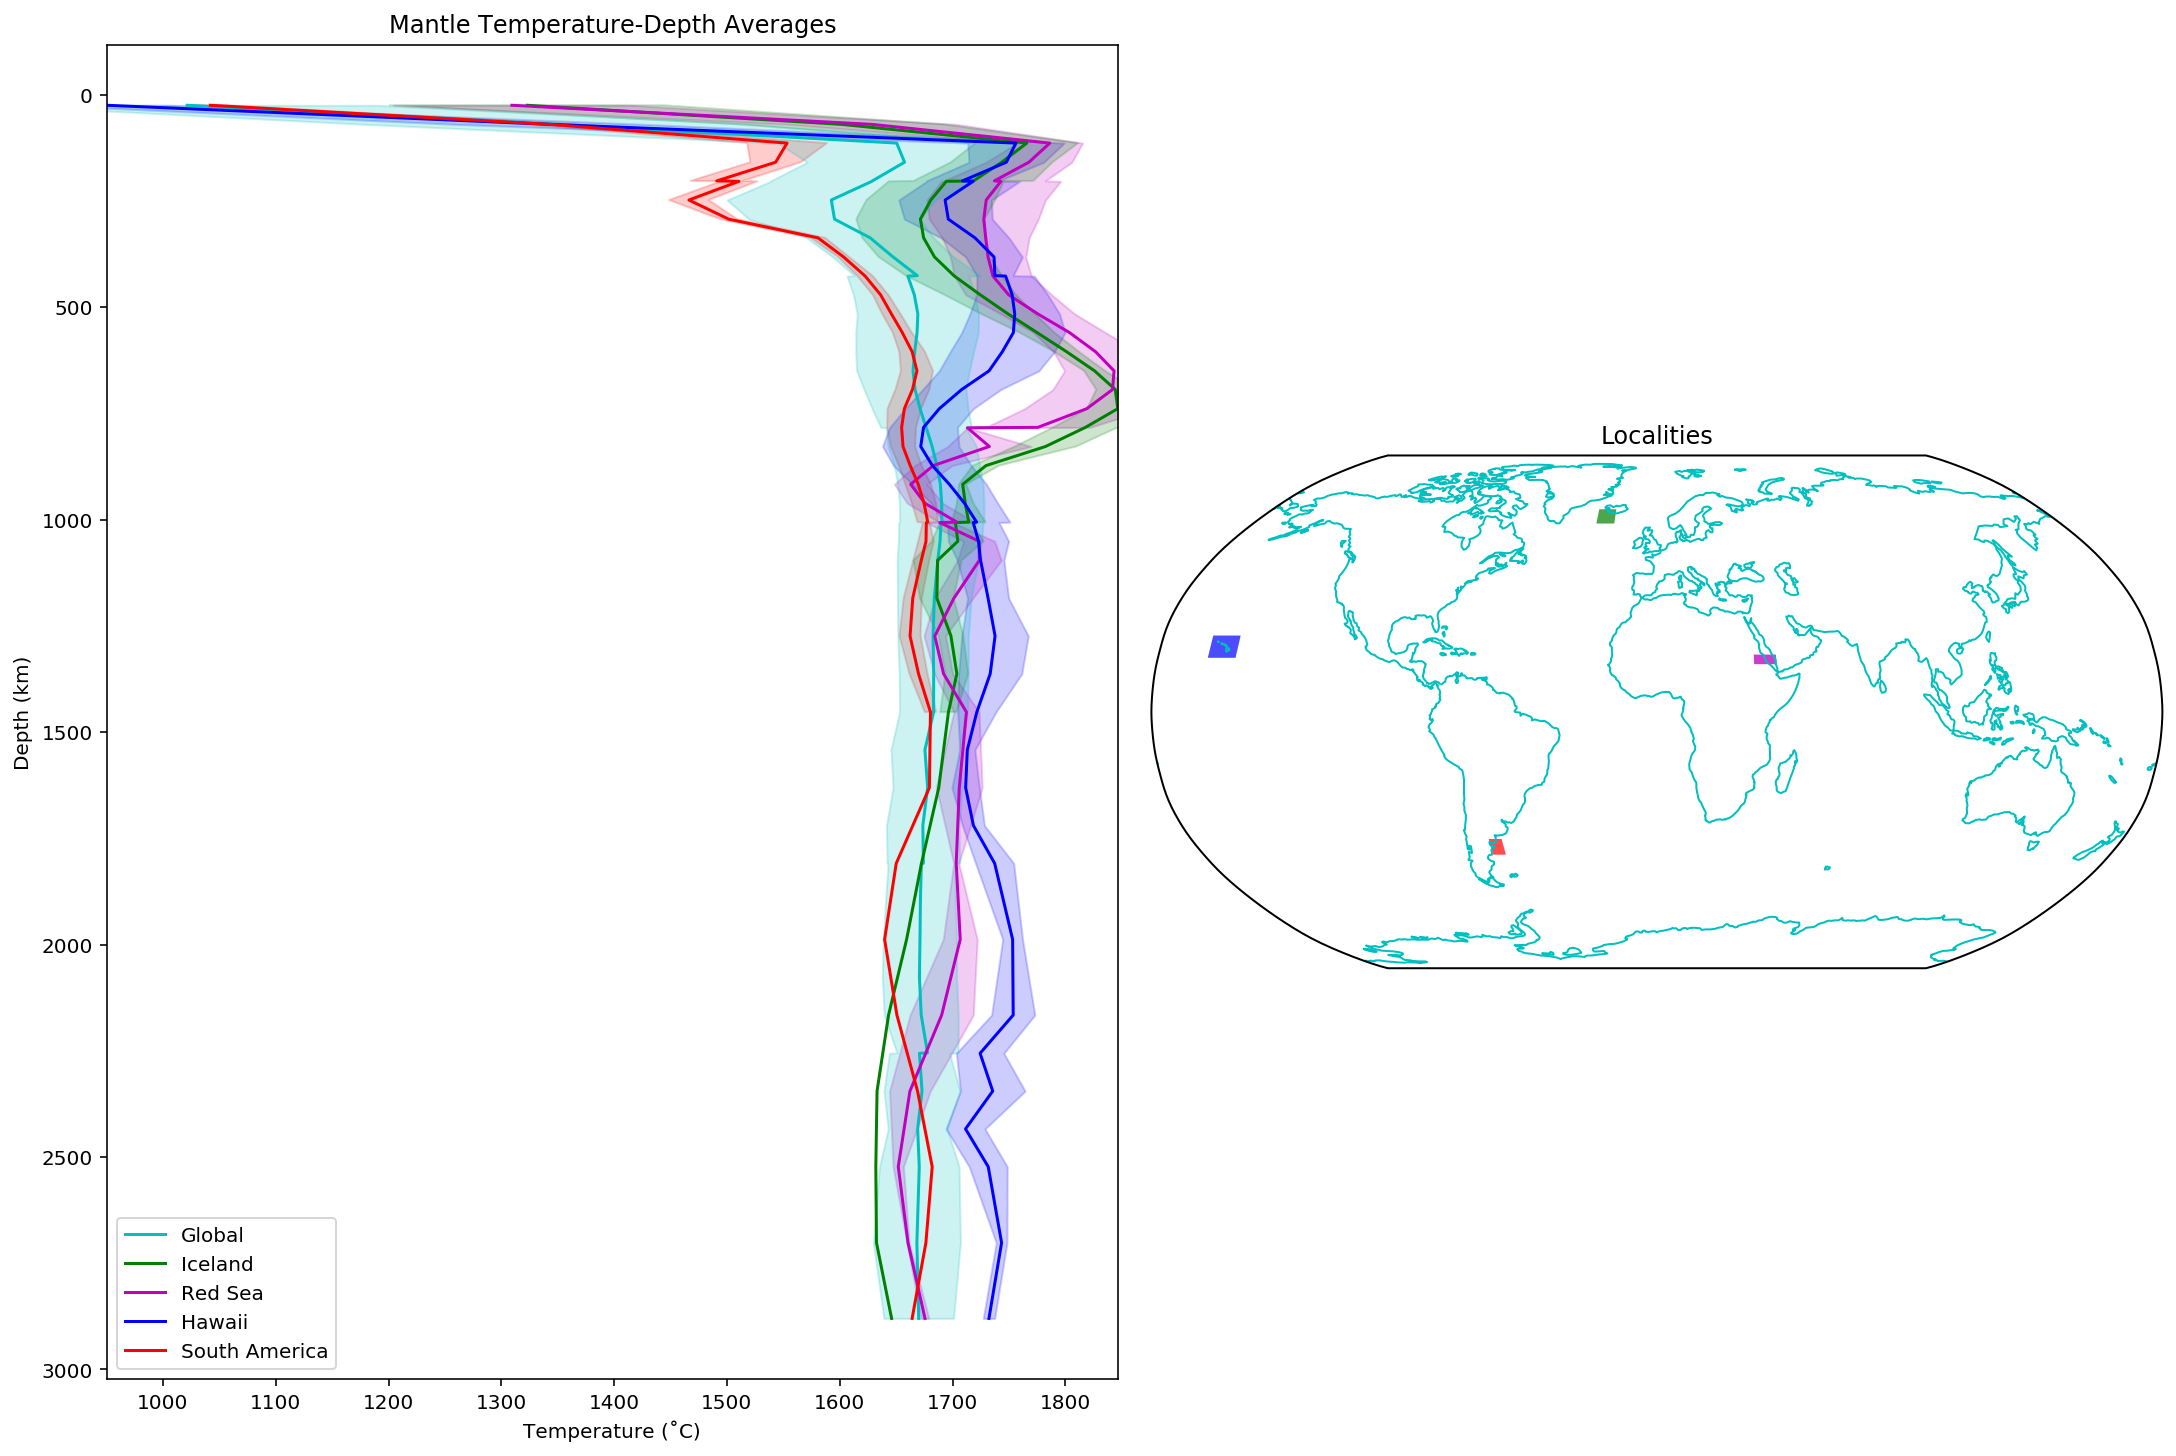

In [118]:
ds_v = ds_u.loc[ds_u['elevation']>60]
ds_t = ds_v.loc[ds_v['elevation']<65]
ds_w = ds_t.loc[ds_t['azimuth']>-27]
ds_o = ds_w.loc[ds_w['azimuth']<-19]
gb_6 = ds_o.groupby('r_rounded')
ds_6 = gb_6.aggregate(np.mean)
ds_6_std = gb_6.aggregate(np.std)

gb = ds_u.groupby('r_rounded')
ds_1 = gb.aggregate(np.mean)
ds_1_std = gb.aggregate(np.std)
std_plus_glob = ds_1+ds_1_std
std_minus_glob = ds_1-ds_1_std
ds_1['std_plus'] = std_plus_glob['T']
ds_1['std_minus'] = std_minus_glob['T']

std_plus = ds_6+ds_6_std
std_minus = ds_6-ds_6_std
ds_6['std_plus'] = std_plus['T']
ds_6['std_minus'] = std_minus['T']

ds_v_rs = ds_u.loc[ds_u['elevation']>15]
ds_t_rs = ds_v_rs.loc[ds_v_rs['elevation']<18]
ds_w_rs = ds_t_rs.loc[ds_t_rs['azimuth']>35]
ds_o_rs = ds_w_rs.loc[ds_w_rs['azimuth']<43]
gb_6_rs = ds_o_rs.groupby('r_rounded')
ds_6_rs = gb_6_rs.aggregate(np.mean)
ds_6_rs_std = gb_6_rs.aggregate(np.std)

std_plus_rs = ds_6_rs+ds_6_rs_std
std_minus_rs = ds_6_rs-ds_6_rs_std
ds_6_rs['std_plus'] = std_plus_rs['T']
ds_6_rs['std_minus'] = std_minus_rs['T']

ds_v_hw = ds_u.loc[ds_u['elevation']>17]
ds_t_hw = ds_v_hw.loc[ds_v_hw['elevation']<24]
ds_w_hw = ds_t_hw.loc[ds_t_hw['azimuth']>-162]
ds_o_hw = ds_w_hw.loc[ds_w_hw['azimuth']<-152]
gb_6_hw = ds_o_hw.groupby('r_rounded')
ds_6_hw = gb_6_hw.aggregate(np.mean)
ds_6_hw_std = gb_6_hw.aggregate(np.std)

std_plus_hw = ds_6_hw+ds_6_hw_std
std_minus_hw = ds_6_hw-ds_6_hw_std
ds_6_hw['std_plus'] = std_plus_hw['T']
ds_6_hw['std_minus'] = std_minus_hw['T']

ds_v_sa = ds_u.loc[ds_u['elevation']>-50]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<-45]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>-65]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<-60]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_sa_m = gb_6_sa.aggregate(np.mean)
ds_6_sa_std = gb_6_sa.aggregate(np.std)

std_plus_sa = ds_6_sa_m+ds_6_sa_std
std_minus_sa = ds_6_sa_m-ds_6_sa_std
ds_6_sa_m['std_plus'] = std_plus_sa['T']
ds_6_sa_m['std_minus'] = std_minus_sa['T']

fig = plt.figure(constrained_layout=True)
gs2 = fig.add_gridspec(1,2)
fig_ax1 = fig.add_subplot(gs2[0])
ds_1.plot(ax=fig_ax1, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'c')
#ds_1.plot(ax=fig_ax1, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'c').invert_yaxis()
ds_6.plot(ax=fig_ax1, x = 'T', y = 'depth_round_2', figsize=(15,10), c='g')
ds_6_rs.plot(ax=fig_ax1, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'm')
ds_6_hw.plot(ax=fig_ax1, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'b')
ds_6_sa_m.plot(ax=fig_ax1, x = 'T', y = 'depth_round_2', figsize=(15,10), c = 'r')
fig_ax1.invert_yaxis()

fig_ax1.legend(["Global", "Iceland","Red Sea", "Hawaii", "South America"]);
fig_ax1.set_ylabel("Depth (km)")
fig_ax1.set_xlabel("Temperature (˚C)")
fig_ax1.set_title('Mantle Temperature-Depth Averages')
fig_ax1.fill_betweenx(ds_6_sa_m['depth_round_2'],ds_6_sa_m['std_plus'], ds_6_sa_m['std_minus'],alpha= .2, color = 'r')
fig_ax1.fill_betweenx(ds_6_hw['depth_round_2'],ds_6_hw['std_plus'], ds_6_hw['std_minus'],alpha= .2, color = 'b')
fig_ax1.fill_betweenx(ds_6_rs['depth_round_2'],ds_6_rs['std_plus'], ds_6_rs['std_minus'],alpha= .2, color = 'm')
fig_ax1.fill_betweenx(ds_6['depth_round_2'],ds_6['std_plus'], ds_6['std_minus'],alpha= .2, color = 'g')
fig_ax1.fill_betweenx(ds_1['depth_round_2'],ds_1['std_plus'], ds_1['std_minus'],alpha= .2, color = 'c')

fig_ax2 = fig.add_subplot(gs2[1], projection=ccrs.Robinson())
fig_ax2.coastlines(resolution = '110m', color = 'c')
fig_ax2.set_global()

fig_ax2.add_patch(mpatches.Rectangle(xy=[-162, 17], width=10, height=7,
                                    facecolor='b',
                                    alpha=0.7,
                                    transform=ccrs.PlateCarree())
                 )
fig_ax2.add_patch(mpatches.Rectangle(xy=[35, 15], width=8, height=3,
                                    facecolor='m',
                                    alpha=0.7,
                                    transform=ccrs.PlateCarree())
                 )

fig_ax2.add_patch(mpatches.Rectangle(xy=[35, 15], width=8, height=3,
                                    facecolor='m',
                                    alpha=0.2,
                                    transform=ccrs.PlateCarree())
                 )

fig_ax2.add_patch(mpatches.Rectangle(xy=[-27, 60], width=8, height=5,
                                    facecolor='g',
                                    alpha=0.7,
                                    transform=ccrs.PlateCarree())
                 )
fig_ax2.add_patch(mpatches.Rectangle(xy=[-65, -45], width=5, height=5,
                                    facecolor='r',
                                    alpha=0.7,
                                    transform=ccrs.PlateCarree())
                 )

fig_ax2.set_title('Localities')

Multiple temperature-depth average profiles through the mantle from sites thought to be actively upwelling or downwelling.  A global depth average is also included for comparison.  This was constructed from averaging temperatures from a rectangle.  

In [119]:
ds_step1 = pd.read_csv('/Users/andrewhollyday/Desktop/Solution0_output.csv', header=None)
ds_step1.columns = ['vel_0', 'vel_1', 'vel_2', 'grav_0', 'grav_1', 'grav_2', 'p', 'T', 'geoid', 'heat_flux','DT', 'strain_rate', 'density', 'viscosity', 'non_ad_T', 'azimuth','elevation','r']
ds_step1.azimuth = ds_step1.azimuth*(180/np.pi)
ds_step1.elevation = ds_step1.elevation*(180/np.pi)
ds_step1['r'] = (((max(ds_step1['r'])) + 25000) - ds_step1['r'])/1000
ds_step1['r_again'] = ds_step1['r']
ds_step1['r_rounded'] = ds_step1['r'].round(0)
ds_step1['depth_round_2'] = ds_step1['r_rounded']
ds_step1

ds = pd.read_csv('/Users/andrewhollyday/Desktop/Solution5_output.csv', header=None)
ds.columns = ['vel_0', 'vel_1', 'vel_2', 'grav_0', 'grav_1', 'grav_2', 'p', 'T', 'geoid', 'heat_flux','DT', 'strain_rate', 'density', 'viscosity', 'non_ad_T', 'azimuth','elevation','r']
ds_u = ds
ds_u.azimuth = ds_u.azimuth*(180/np.pi)
ds_u.elevation = ds_u.elevation*(180/np.pi)
ds_u['r'] = (((max(ds_u['r'])) + 25000) - ds_u['r'])/1000
ds_u['r_again'] = ds_u['r']
ds_u['r_rounded'] = ds_u['r'].round(0)
ds_u['depth_round_2'] = ds_u['r_rounded']

#subtracted = ds_u['vel_0','vel_1','vel_2'].sub(ds_step1['vel_0','vel_1','vel_2'], fill_value=0)


In [120]:
ds_subV0 = ds_step1['vel_0'] - ds_u['vel_0']#,'vel_1','vel_2'] - ds_u['vel_0','vel_1','vel_2']
ds_subV1 = ds_step1['vel_1'] - ds_u['vel_1']
ds_subV2 = ds_step1['vel_2'] - ds_u['vel_2']

In [121]:
ds_step1['vel0diff'] = ds_subV0
ds_step1['vel1diff'] = ds_subV1
ds_step1['vel2diff'] = ds_subV2

In [122]:
ds_u['vel0diff'] = ds_subV0
ds_u['vel1diff'] = ds_subV1
ds_u['vel2diff'] = ds_subV2

In [123]:
ds_v_sa = ds_step1.loc[ds_step1['elevation']>-50]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<-49]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>-60]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<-58]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_sa = gb_6_sa.aggregate(np.mean)

ds_v_sa = ds_u.loc[ds_u['elevation']>0]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<10]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>0]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<25]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_rs = gb_6_sa.aggregate(np.mean)

dsU_1 = ds_u.loc[ds_u['elevation']>9]
dsU_2 = dsU_1.loc[dsU_1['elevation']<27]
dsU_3 = dsU_2.loc[dsU_2['azimuth']>35]
dsU_4 = dsU_3.loc[dsU_3['azimuth']<45]
dsU_5 = dsU_4.loc[dsU_4['r']<1500]
dsU_6 = dsU_4.loc[dsU_4['r']>1500]

half_top1 = dsU_5.iloc[::2]
half_top2 = half_top1.iloc[::2]
half_top3 = half_top2.iloc[::2]
half_top = half_top3.iloc[::2]

framez = [half_top, dsU_6]
dsU_7 = pd.concat(framez)

a = dsU_7['elevation']
b = dsU_7['azimuth']
c = dsU_7['r']
d = dsU_7['vel0diff']
e = dsU_7['vel1diff']
f = dsU_7['vel1diff']
total = (d**2 + e**2 + f**2)**(.5)

g = dsU_7['T']

In [124]:
ds_v_sa = ds_step1.loc[ds_step1['elevation']>-50]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<-49]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>-60]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<-58]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_sa = gb_6_sa.aggregate(np.mean)

In [125]:
ds_v_sa = ds_step1.loc[ds_step1['elevation']>0]
ds_t_sa = ds_v_sa.loc[ds_v_sa['elevation']<10]
ds_w_sa = ds_t_sa.loc[ds_t_sa['azimuth']>0]
ds_o_sa = ds_w_sa.loc[ds_w_sa['azimuth']<25]
gb_6_sa = ds_o_sa.groupby('r_rounded')
ds_6_rs = gb_6_sa.aggregate(np.mean)

In [126]:
dsU_1 = ds_step1.loc[ds_step1['elevation']>9]
dsU_2 = dsU_1.loc[dsU_1['elevation']<27]
dsU_3 = dsU_2.loc[dsU_2['azimuth']>35]
dsU_4 = dsU_3.loc[dsU_3['azimuth']<45]
dsU_5 = dsU_4.loc[dsU_4['r']<1500]
dsU_6 = dsU_4.loc[dsU_4['r']>1500]

In [127]:
half_top1 = dsU_5.iloc[::2]
half_top2 = half_top1.iloc[::2]
half_top3 = half_top2.iloc[::2]
half_top = half_top3.iloc[::2]

In [128]:
framez = [half_top, dsU_6]
dsU_7 = pd.concat(framez)

Text(0, 0.5, 'Latitude (degrees)')

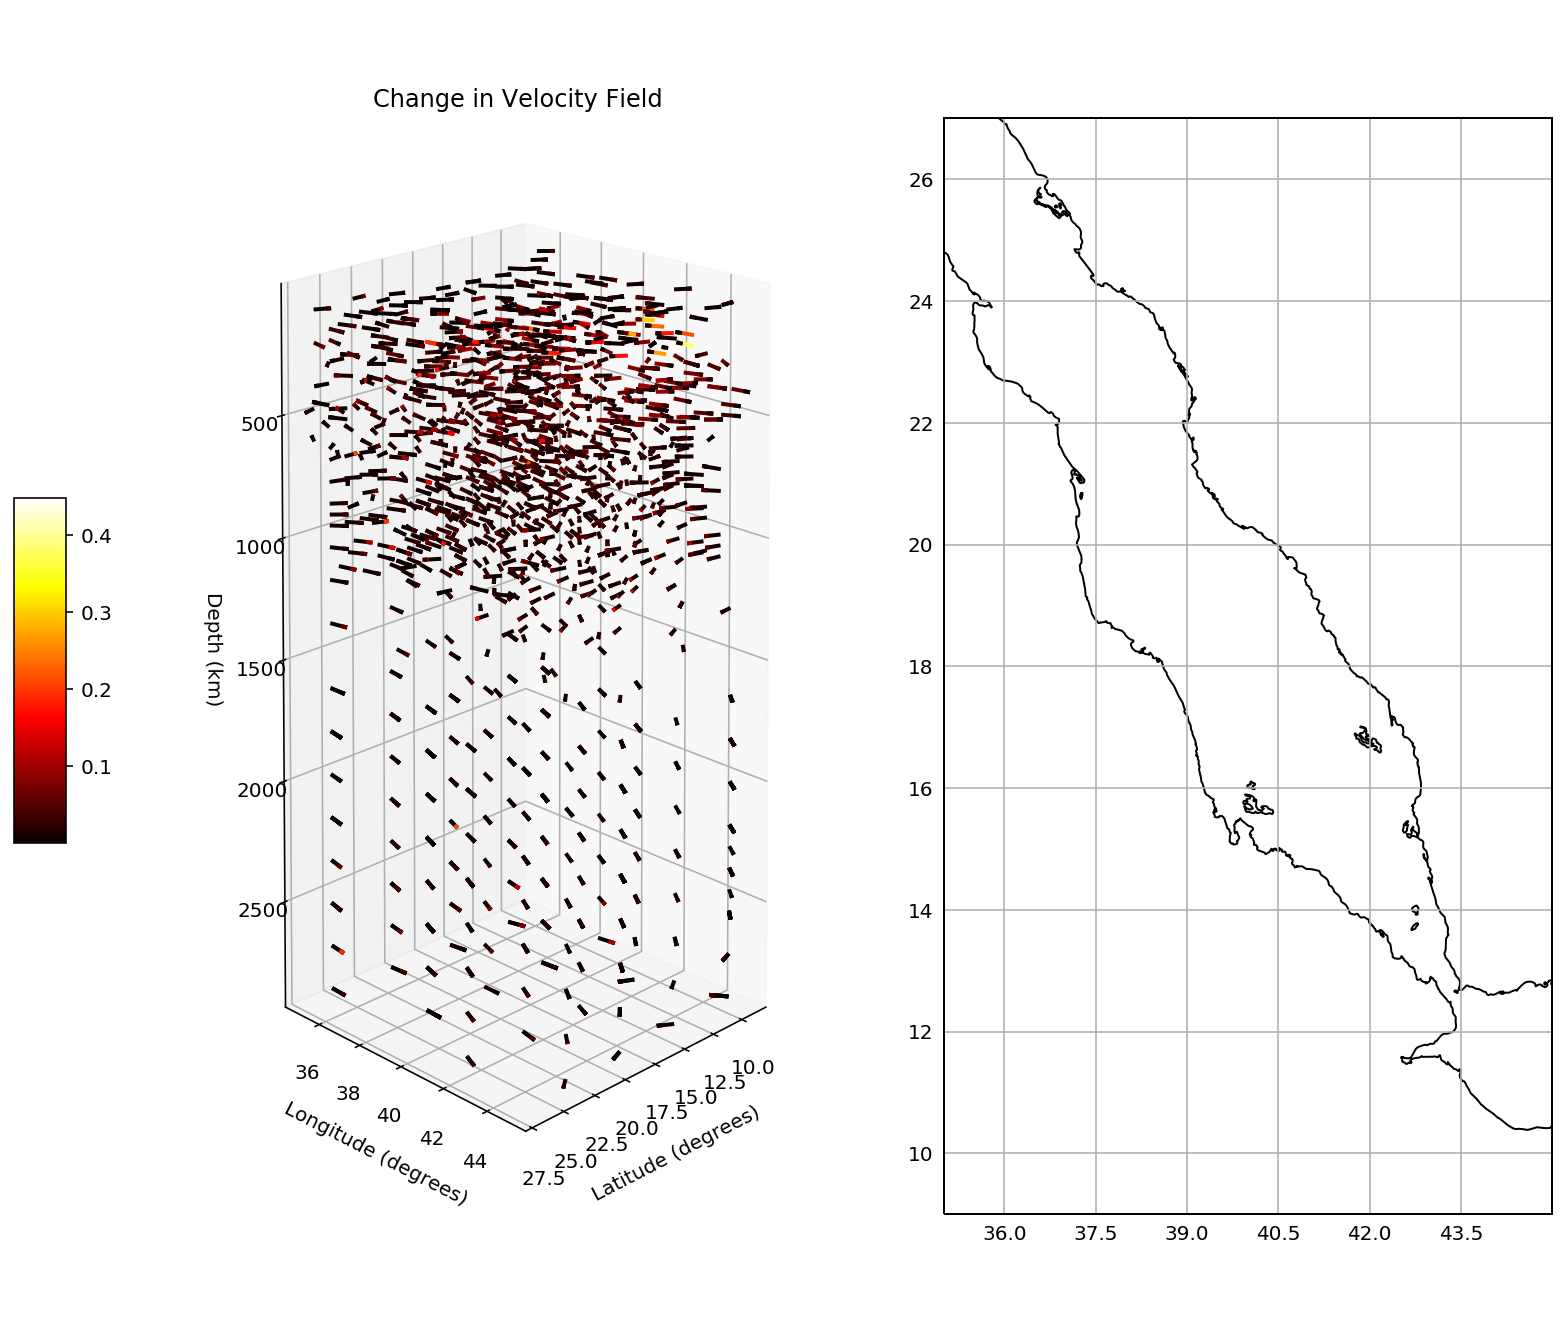

In [129]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())

M = ax1.quiver(a,b,c,d,e,f, normalize = True, lw=2, cmap = 'hot')
M.set_array(total)
ax1.invert_zaxis()
cbaxes = fig.add_axes([0.01, 0.4, 0.03, 0.2]) 
plt.colorbar(M, cax = cbaxes)

ax2.coastlines(resolution='10m')
extent = [45, 35, 27, 9]
ax2.set_extent(extent)

ax1.view_init(elev = 10, azim=45)
ax1.set_title('Change in Velocity Field')
ax1.set_xlabel("Latitude (degrees)")
ax1.set_ylabel("Longitude (degrees)")
ax1.set_zlabel("Depth (km)", labelpad = 15)
ax2.set_xlabel("Longitude (degrees)")
ax2.set_ylabel("Latitude (degrees)")



lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

ax2.set_xlabel("Longitude (degrees)")
ax2.set_ylabel("Latitude (degrees)")

This is a 3D change in flow velocity diagram in the Red Sea where the dynamic uplift signal is strong.  The flow velocities were subtracted from an initial time step solution, which resolved how flow has changed over the course of the model run.  This is a key visual since it provide mechanistic explanation for the positive dynamic topography signal in this region.  

In [130]:
a = dsU_7['elevation']
b = dsU_7['azimuth']
c = dsU_7['r']
d = dsU_7['vel_0']
e = dsU_7['vel_1']
f = dsU_7['vel_2']
total = (d**2 + e**2 + f**2)**(.5)

g = dsU_7['T']

In [131]:
ptlon1 = -80
ptlat1 = -45
ptlon2 = -10
ptlat2 = -45

#ptlon1 = 1
#ptlat1 = 1
#ptlon2 = -50
#ptlat2 = 45

ptlon1_radians = math.radians(ptlon1)
ptlat1_radians = math.radians(ptlat1)
ptlon2_radians = math.radians(ptlon2)
ptlat2_radians = math.radians(ptlat2)

distance_radians=2*math.asin(math.sqrt(math.pow((math.sin((ptlat1_radians-ptlat2_radians)/2)),2) + math.cos(ptlat1_radians)*math.cos(ptlat2_radians)*math.pow((math.sin((ptlon1_radians-ptlon2_radians)/2)),2)))
# 6371.009 represents the mean radius of the earth
# shortest path distance
distance_km = 6371.009 * distance_radians

mylats = []
mylons = []

# write the starting coordinates
mylats.append([])
mylons.append([])
mylats[0] = ptlat1
mylons[0] = ptlon1 

numberofsegments = round(distance_km)
onelessthansegments = numberofsegments - 1
fractionalincrement = (1.0/onelessthansegments)

f = fractionalincrement
icounter = 1
while (icounter <  onelessthansegments):
        icountmin1 = icounter - 1
        mylats.append([])
        mylons.append([])
        # f is expressed as a fraction along the route from point 1 to point 2
        A=math.sin((1-f)*distance_radians)/math.sin(distance_radians)
        B=math.sin(f*distance_radians)/math.sin(distance_radians)
        x = A*math.cos(ptlat1_radians)*math.cos(ptlon1_radians) + B*math.cos(ptlat2_radians)*math.cos(ptlon2_radians)
        y = A*math.cos(ptlat1_radians)*math.sin(ptlon1_radians) +  B*math.cos(ptlat2_radians)*math.sin(ptlon2_radians)
        z = A*math.sin(ptlat1_radians) + B*math.sin(ptlat2_radians)
        newlat=math.atan2(z,math.sqrt(math.pow(x,2)+math.pow(y,2)))
        newlon=math.atan2(y,x)
        newlat_degrees = math.degrees(newlat)
        newlon_degrees = math.degrees(newlon)
        mylats[icounter] = newlat_degrees
        mylons[icounter] = newlon_degrees
        icounter += 1
        f = f + fractionalincrement

# write the ending coordinates
mylats.append([])
mylons.append([])
mylats[onelessthansegments] = ptlat2
mylons[onelessthansegments] = ptlon2

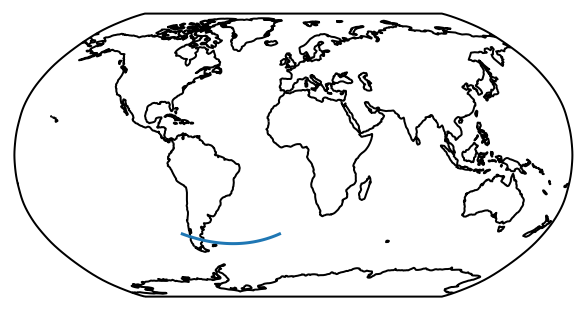

In [132]:
fig, ax = plt.subplots(figsize=(5,5),subplot_kw={'projection': ccrs.Robinson()})
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
map1 = ax.plot(mylons,mylats,100,transform=ccrs.PlateCarree())


In [133]:
ds_u['lat_round'] = round(ds_u['azimuth'])
ds_u['lon_round'] = round(ds_u['elevation'])

In [134]:
d = {'Latitude_GC':mylats, 'Longitude_GC':mylons}
gc_df = pd.DataFrame(d)
gc_df = round(gc_df)

In [135]:
new = ds_u[['lat_round', 'lon_round']].copy()

In [136]:
def asvoid(arr):
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))

def in1d_index(a, b):
    voida, voidb = map(asvoid, (a, b))
    return np.where(np.in1d(voidb, voida))[0]    

a = gc_df
b = new
#print(in1d_index(a, b))

index_forDs_u = in1d_index(a, b)

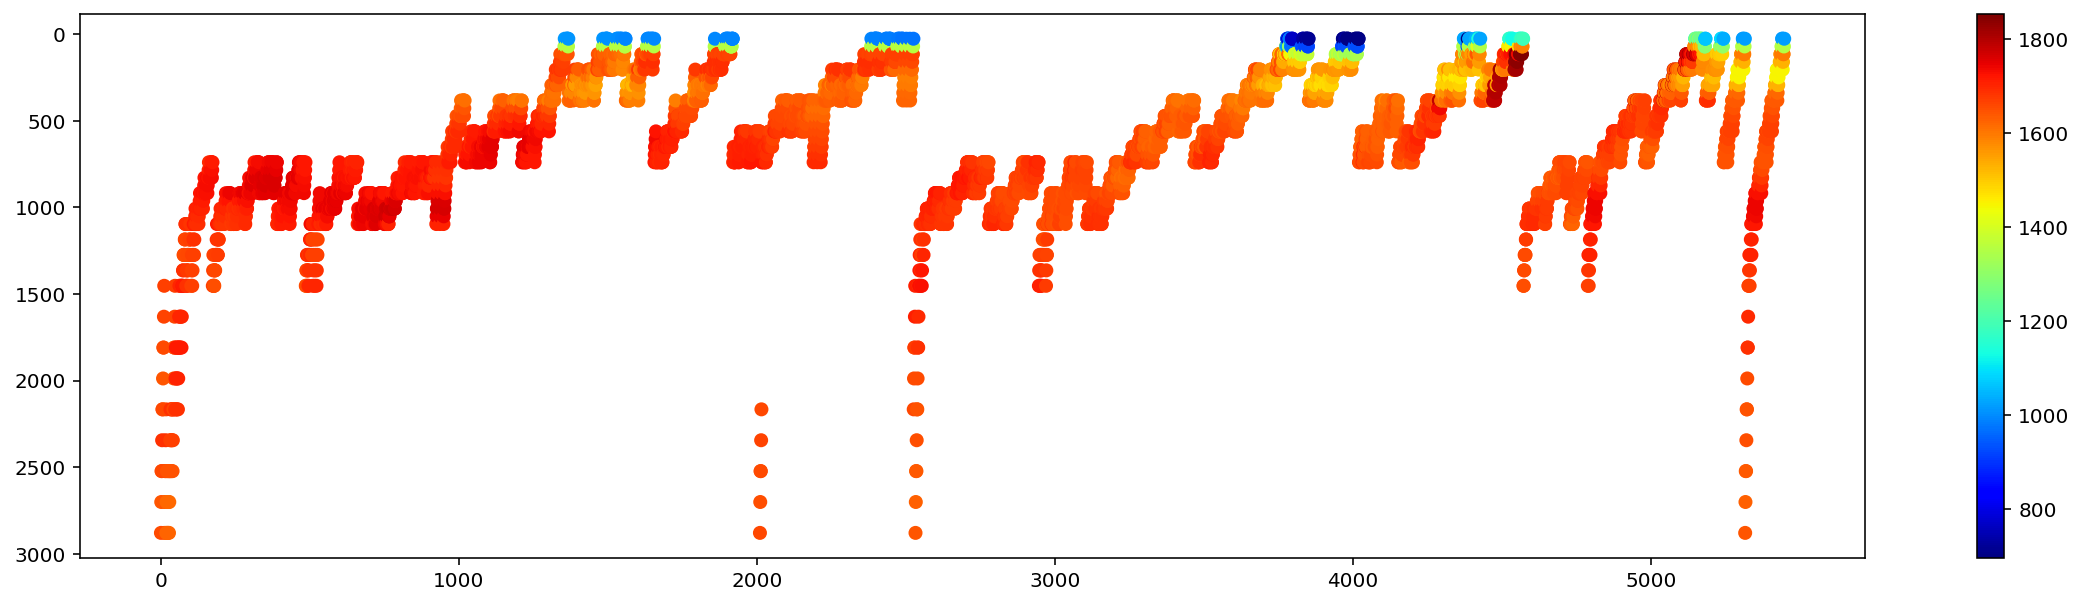

In [137]:
fig, ax111 = plt.subplots(1,1,figsize=(20,5))
lon_final = ds_u['azimuth'] 
lat_final = ds_u['elevation']
depth_final = ds_u['r']
temp_final = ds_u['T']
x_f = arange(0,len(lat_final[index_forDs_u]))
y_f = depth_final[index_forDs_u]
z_f = temp_final[index_forDs_u]

ax111.invert_yaxis()
CS = ax111.scatter(x_f,y_f,c=z_f, cmap=plt.cm.jet)
fig.colorbar(CS, ax=ax111)

This is a quick scatter plot cross section along a great circle profile.  

In [138]:
minx = min(x_f)
maxx = max(x_f)
miny = min(y_f)
maxy = max(y_f)

In [139]:
x_cont = np.arange(minx,maxx,1)
y_cont = np.arange(miny,maxy,1)
x_cont,y_cont = np.meshgrid(x_f,y_cont)
z_cont = griddata((x_f,y_f),z_f,(x_f,y_cont),method='linear')
len(x_cont)

2856

/Users/andrewhollyday/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'cbar_kwargs'
  del sys.path[0]


AttributeError: 'AxesSubplot' object has no attribute 'set_yaxis'

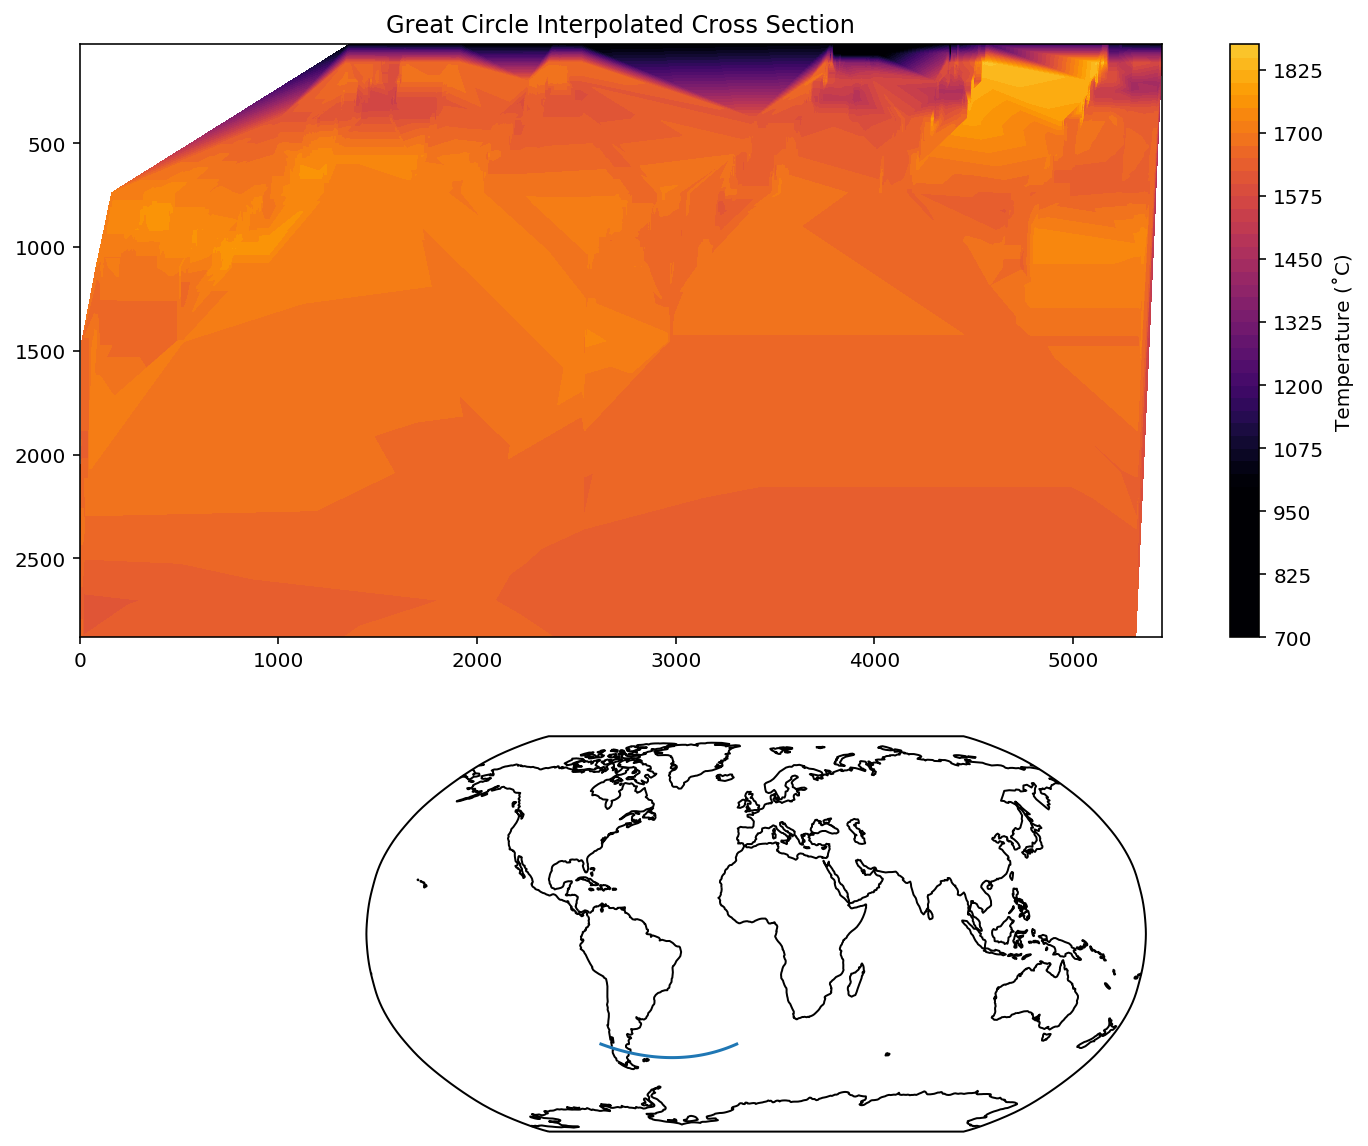

In [140]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20,10))

gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios = [3,2]) 
ax113 = plt.subplot(gs[2], projection=ccrs.Robinson())
ax113.set_global()
ax113.coastlines()
ax113.plot(mylons,mylats,100,transform=ccrs.PlateCarree())

ax112 = plt.subplot(gs[0])
ax112.invert_yaxis()
CS = ax112.contourf(x_cont,y_cont,z_cont,50, cmap = plt.cm.inferno, cbar_kwargs={},vmin=1000,vmax=2000)
cbar = fig.colorbar(CS, cmap = plt.cm.inferno,label='Temperature (˚C)')

ax112.set_title("Great Circle Interpolated Cross Section")
ax112.set_yaxis('Depth (km)')

This is a contoured profile along a great circle path form any two latitude and longitude pairs.  This will be an important tool for my research; however, I'm not totally impressed by the quality of the resolution in comparison to the contour plots above.  This is will be a focus of future work.  